# **Bank Marketing DataSet - Intelligent Targeting**

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. Some important aspects of a marketing campaign are as follows: 

**Segment of the Population:** To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign. 

**Distribution channel to reach the customer's place:** Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.) 

**Promotional Strategy:** This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an in-depth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

You are leading the marketing analytics team for a banking institution. There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.

You are provided a dataset containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc. Can you help the bank to predict accurately whether the customer will subscribe to the focus product for the campaign - Term Deposit after the campaign?

##  Life Cycle of the Project:
    1.Data Analysis
    2.Feature Engineering
    3.Feature Selection
    4.Model Building
    5.Model Deployment

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [4]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

### Exploratory Data Analysis

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.  

We have been provided three files. A description for what each of these files contain is given below:


1.     **SampleSubmission.csv**: This gives us a required format for submitting our solutions to the AV solution checker.
2.     **Train.csv**: We will use this file for training our model. It contains variables or features that we will input to our model, and the *target variable* that we want to predict.
3.     **Test.csv**: This will contain all variables in the training dataset except the *target variable*. We will use our trained model to predict the target for this dataset. 


#### Reading the data

In [5]:
train = pd.read_csv('D:/Business Analytics/Analytics Vidya/Bank Marketing Dataset - Intelligent Targeting/Train.csv', sep=',')
test = pd.read_csv('D:/Business Analytics/Analytics Vidya/Bank Marketing Dataset - Intelligent Targeting/Test.csv', sep=',')

In [6]:
# Complete Dataset
#data = train.append(test)

In [7]:
sample_sub = pd.read_csv('D:/Business Analytics/Analytics Vidya/Bank Marketing Dataset - Intelligent Targeting/Sample_Submission.csv', sep=',')

#### Brief look at the dataset

In [8]:
train.head(3)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0


In [9]:
test.head(3)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown


In [10]:
train.rename(columns={'term_deposit_subscribed':'target'},inplace=True)
test.rename(columns={'term_deposit_subscribed':'target'},inplace=True)

#### Dataset Shape (Number of Samples and Variables in the dataset)

In [11]:
print(f'\nTrain dataset contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest dataset contains {test.shape[0]} samples and {test.shape[1]} variables')
feature = [feature for feature in train.columns.difference(['target','id'])]
print(f'\nDataset contains {len(feature)} features')


Train dataset contains 31647 samples and 18 variables

Test dataset contains 13564 samples and 17 variables

Dataset contains 16 features


#### Target Distribution

This is a binary classification problem. Lets have a look at the number of positive and negative examples that we have. In our problem statement terms: '*Number of People who did subscribe for a term deposit and the number of people who did not'*

In [12]:
train.target.value_counts(normalize=True).round(4)

0    0.8928
1    0.1072
Name: target, dtype: float64

Visually we are able to see communicate things more clearly and graphs help us do that. Lets visualize the same target distribution in a countplot.

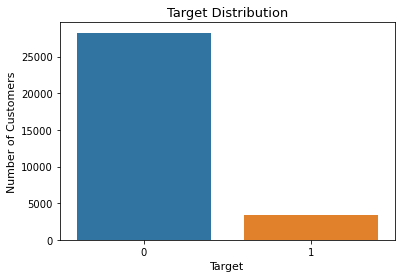

In [13]:
sns.countplot(data=train,x='target')
plt.title('Target Distribution',fontsize=13)
plt.xlabel('Target',fontsize=11)
plt.ylabel('Number of Customers',fontsize=11)
plt.show()

Quite obviously dataset is very imbalanced. Only about 10 % of the examples are positive.

#### Variables Datatypes

In [14]:
train.dtypes

id                                   object
customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
target                                int64
dtype: object

Looks like we have a mixture of datatypes, a lot of these variables are object datatypes. Object datatypes are used to store strings along with other non-numeric data.

Machine Learning Models understand only numbers so we will have to later convert these strings to numbers

#### Null Values

In [15]:
100*(train.isnull().sum()/train.shape[0]).round(4).sort_values(ascending=False)

days_since_prev_campaign_contact    81.62
customer_age                         1.96
balance                              1.26
last_contact_duration                0.98
personal_loan                        0.47
marital                              0.47
num_contacts_in_campaign             0.35
job_type                             0.00
education                            0.00
default                              0.00
target                               0.00
housing_loan                         0.00
prev_campaign_outcome                0.00
communication_type                   0.00
day_of_month                         0.00
month                                0.00
num_contacts_prev_campaign           0.00
id                                   0.00
dtype: float64

One feature 'days_since_prev_campaign_contact' has a lot of null values around 81.6 %, which might mean that these customers were never reached out in the previous campaign, there are few missing values in customer age, balance, last contact duration, personal loan, marital status & number of contacts in campaign

#### Unique values in each variables

In [16]:
train.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
target                                  2
dtype: int64

The numerical features 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign' contain a lot of unique values which is quite obvious.

Similarly 'day_of_month' contains 31 unique values for each of 31 possible days in a month. Month from January to December contains '12' unique values.

#### Analyzing each variable & their relationships 

There are two types of features that we have:

1. Categorical
2. Numerical

Also our target is Binary

For each feature type we will be perform two types of analysis:

1. Univariate: Analyze 1 feature at a time

2. Bivariate: Analyze the relationship of that feature with target variable, i.e. 'term_deposit_subscribed'(target)


But before jumping straight into analysis, lets have a look at the variables we had and try to ask some questions ourselves



In [17]:
train.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome', 'target'],
      dtype='object')

#### Segregating Categorical & Numerical Variables

In [18]:
cat_feature = [feature for feature in train.columns.difference(['id']) if (train[feature].dtype=='O')]
num_feature = [feature for feature in train.columns.difference(['target']) if (train[feature].dtype=='int64')|(train[feature].dtype=='float64')]
#cat_feature = [feature for feature in train.columns if feature not in num_feature ]

In [19]:
num_feature

['balance',
 'customer_age',
 'day_of_month',
 'days_since_prev_campaign_contact',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign']

In [20]:
cat_feature

['communication_type',
 'default',
 'education',
 'housing_loan',
 'job_type',
 'marital',
 'month',
 'personal_loan',
 'prev_campaign_outcome']

#### Categorical Features

#### **Univariate Analysis - Pie Charts.**

Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

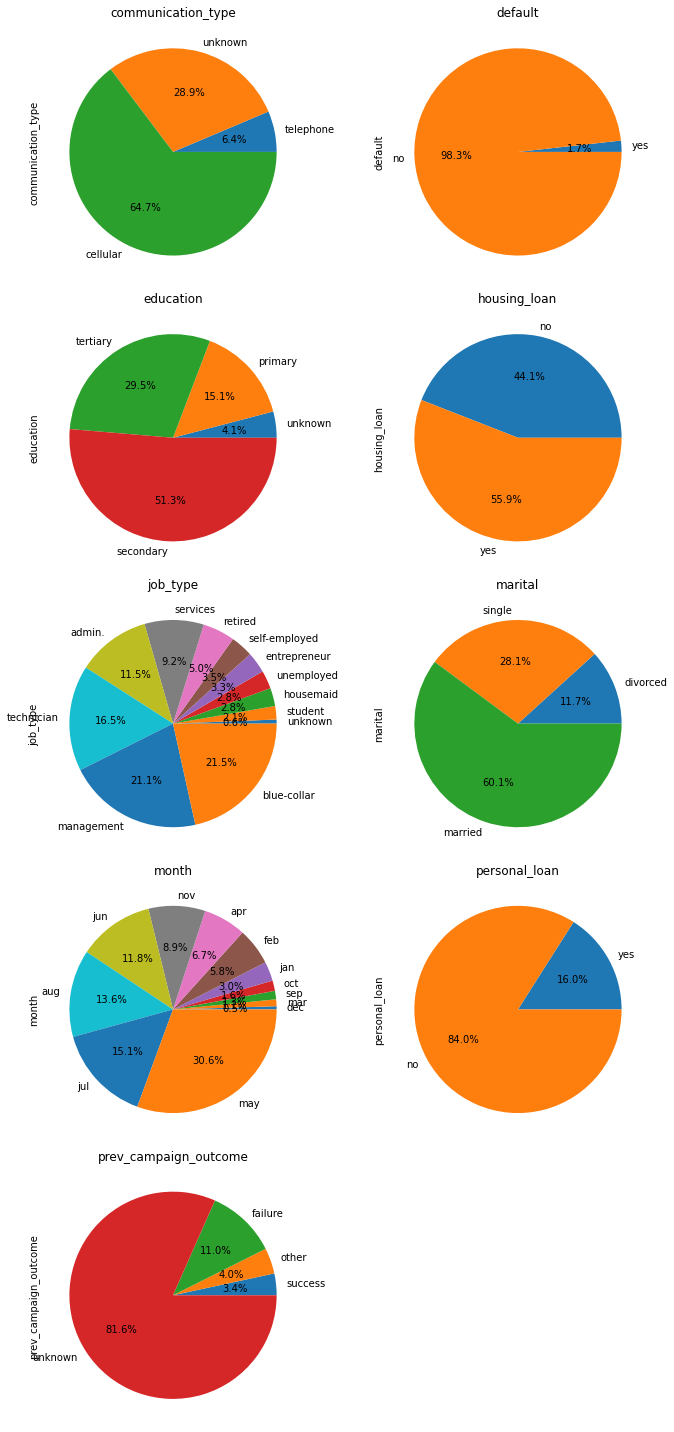

In [21]:
plt.figure(figsize=(10,20))
for i,feature in enumerate(cat_feature):
    data = train.copy()
    plt.subplot(5,2,i+1)
    data[feature].value_counts()[::-1].plot(kind='pie', autopct='%1.1f%%')
    plt.title(feature)
    plt.tight_layout()
    

#### **Univariate Analysis - CountPlots**

Another way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable

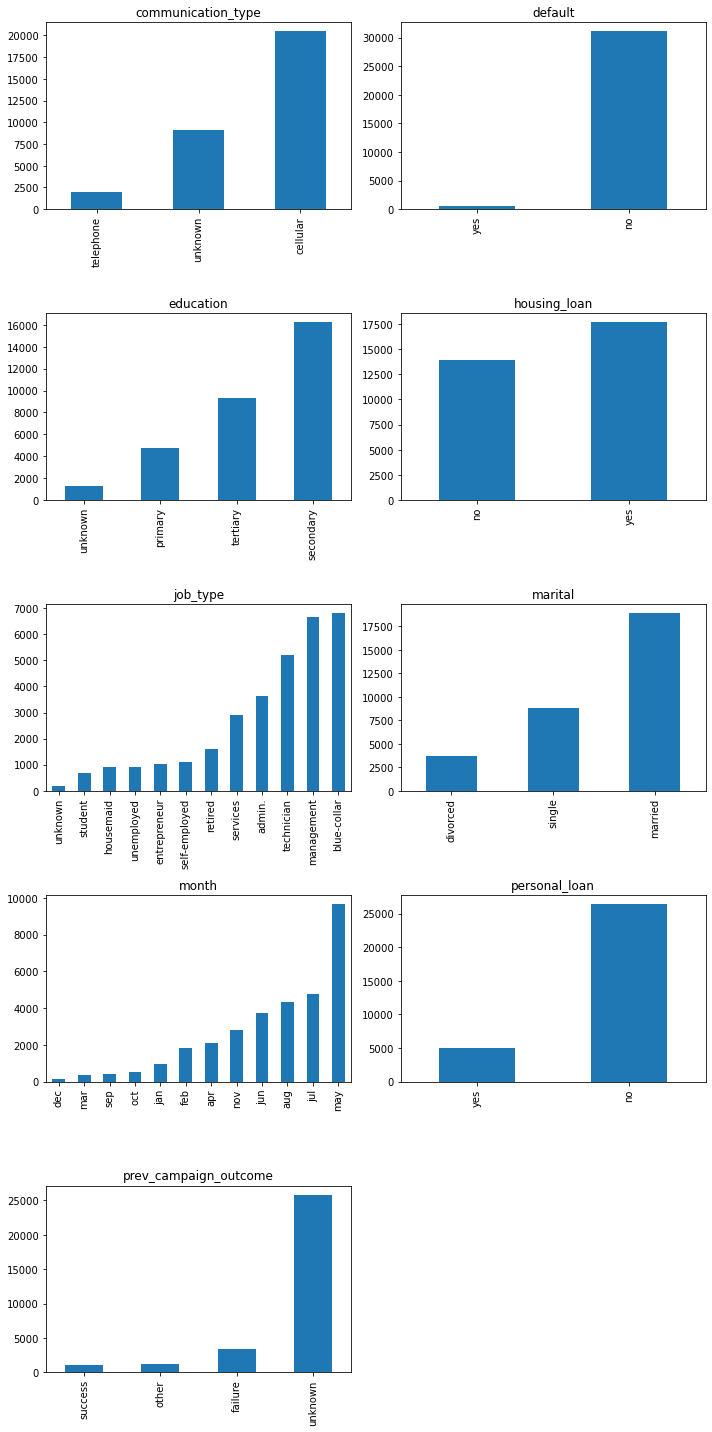

In [22]:
plt.figure(figsize=(10,20))
for i,feature in enumerate(cat_feature):
    data = train.copy()
    plt.subplot(5,2,i+1)
    data[feature].value_counts()[::-1].plot(kind='bar')
    plt.title(feature)
    plt.tight_layout()

#### Bivariate Analysis - Relationship with Target

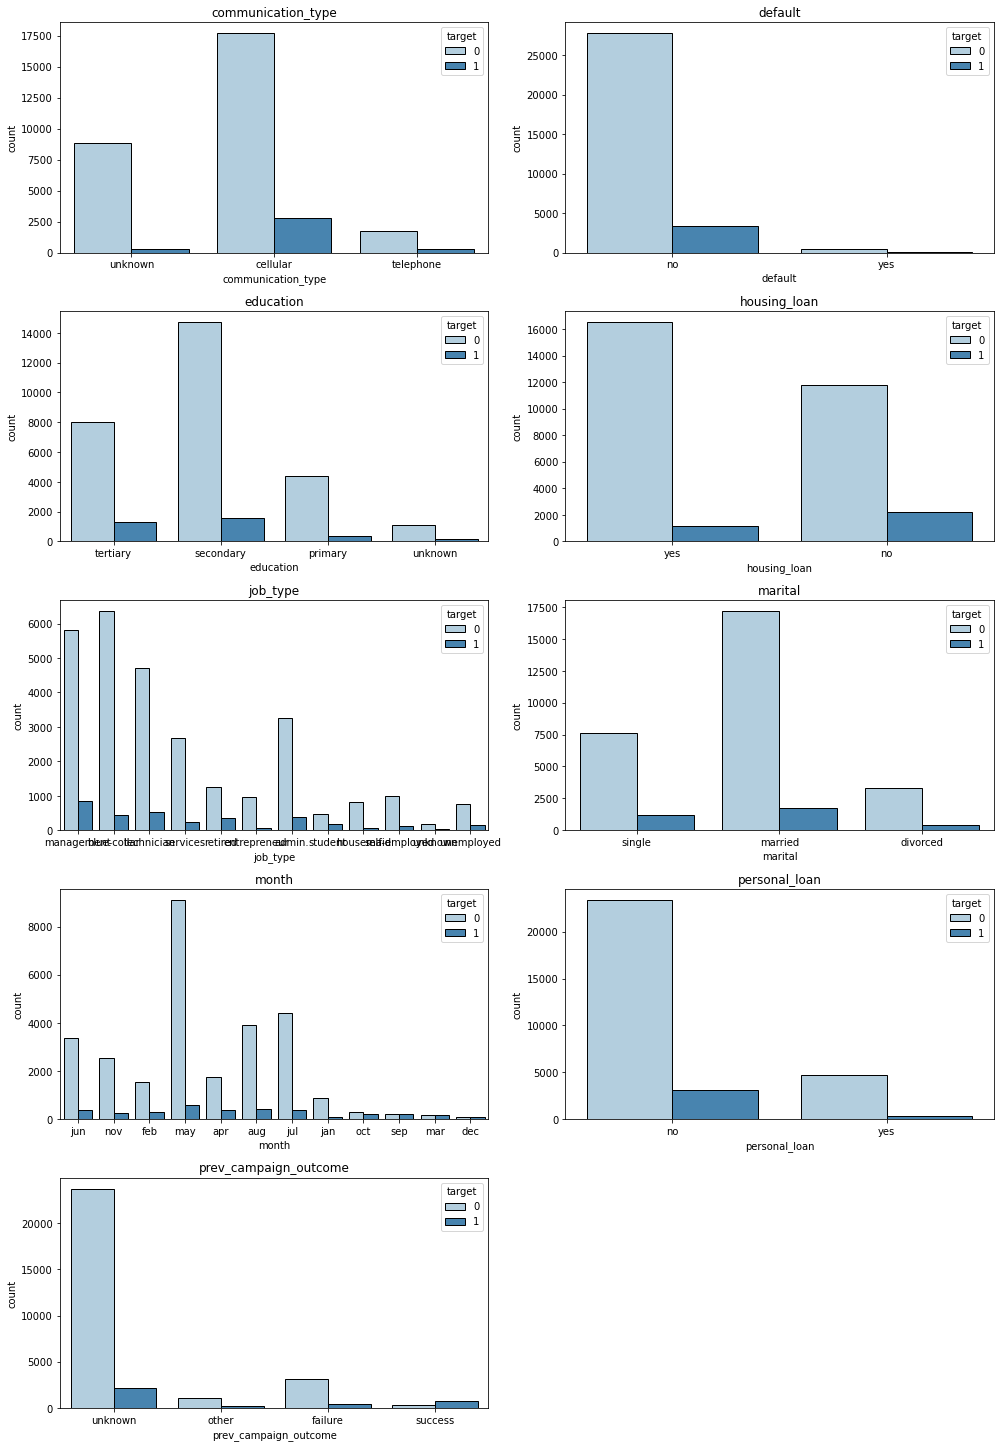

In [23]:
plt.figure(figsize=(14,20))
for i,feature in enumerate(cat_feature):
    data = train.copy()
    plt.subplot(5,2,i+1)
    plt.tight_layout()
    sns.countplot(x=feature,hue='target',data=data,palette = "Blues",edgecolor='black')
    plt.title(feature)

**Q. Do married people have more chances of subscribing to a term deposit ?**


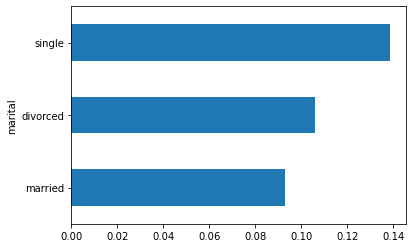

In [24]:
train.groupby(by='marital')['target'].mean().sort_values().plot(kind='barh')
plt.show()

The data tells us quite a different story than our initial thought process, single people are the more likely to subscribe to a term deposit. 

#### Numerical Features

#### Univariate Analysis - Boxplots

Boxplot can be used to see the spread of the numerical variables, and identify outliers

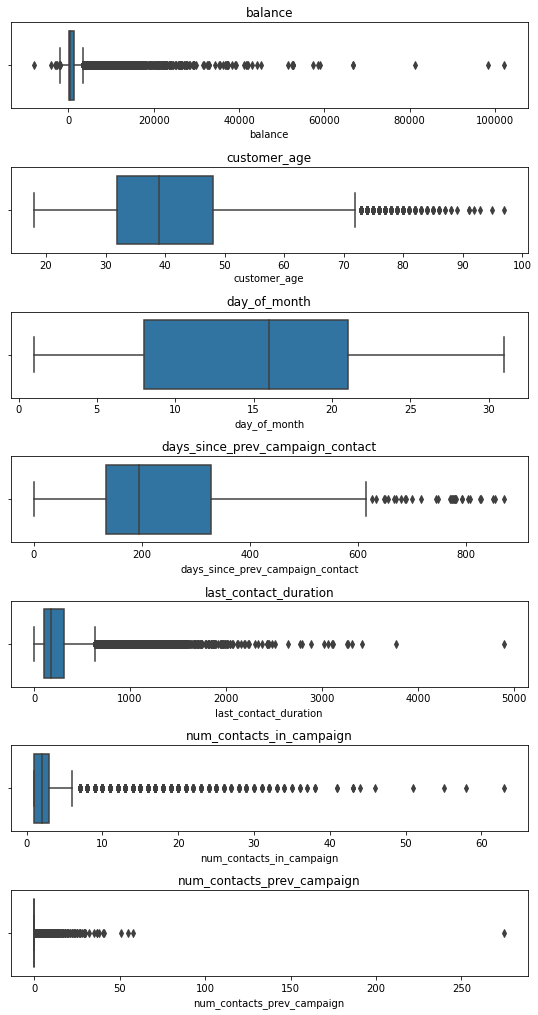

In [25]:
plt.figure(figsize=(8,14))
for i,feature in enumerate(num_feature):
    data = train.copy()
    plt.subplot(7,1,i+1)
    plt.tight_layout()
    sns.boxplot(data[feature])
    plt.title(feature)

#### Univariate Analysis - Density Plots

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.


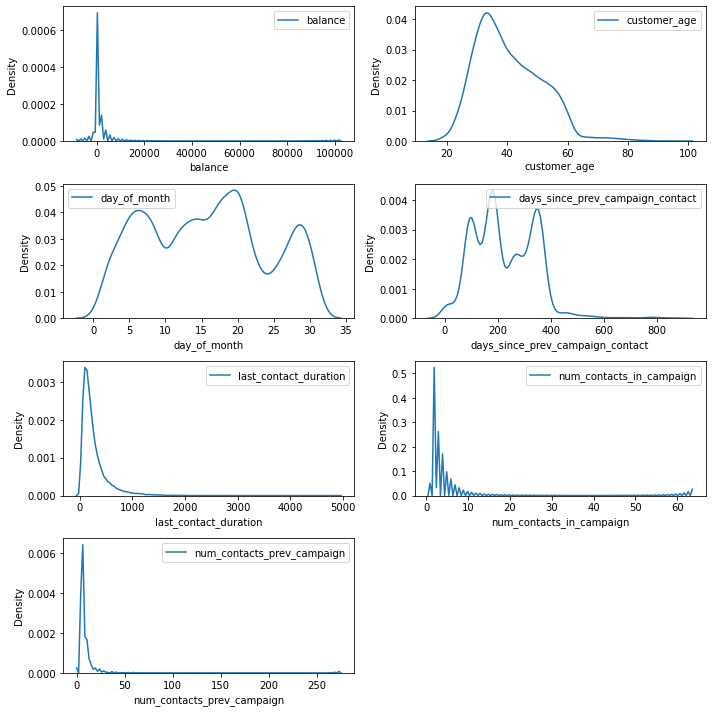

In [26]:
plt.figure(figsize=(10,10))
for i,feature in enumerate(num_feature):
    data = train.copy()
    plt.subplot(4,2,i+1)
    sns.kdeplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()

**Q. Do people with a higher bank balance more likely subscribe to term deposit than people with low balance ?**

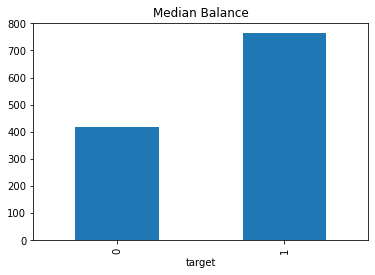

In [27]:
train.groupby(by='target')['balance'].median().plot(kind='bar',title='Median Balance')
plt.show()

If you see the plot above median balance of customers not subscribing to a term deposit is around 400 whereas median balance of customers subscribing to a term deposit is 800. This definitely supports our initial hypothesis.

**Q. Does the length of the call made to the customers tell us anything about their chances of subscribing ?**

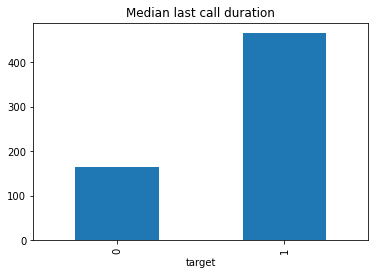

In [28]:
train.groupby(by='target')['last_contact_duration'].median().plot(kind='bar',title='Median last call duration')
plt.show()

From the plot above median last_call_duration made to the customers not subscribing to a term deposit is around 150 seconds. Median last_call_duration made to the customers subscribing to a term deposit is around 450 seconds. So yes our hypothesis seems true.

**Q. Are younger customers more likely to subscribe to a term deposit compared to old customers ?**

It's not very clear from our above plot since we have median age of around 40 for both cases

Lets dig deeper.

We will define:
 old as Age > 60
 Not Old as Age <= 60

In [29]:
train['old'] = np.where((train.customer_age>50),1,0)

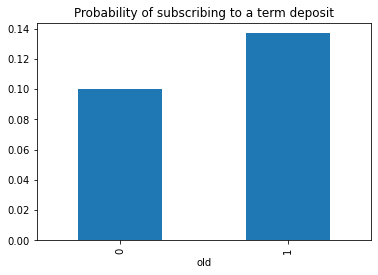

In [30]:
train.groupby(by='old')['target'].mean().plot(kind='bar',title='Probability of subscribing to a term deposit')
plt.show()

#### Bivariate Analysis - Correlation Heatmaps

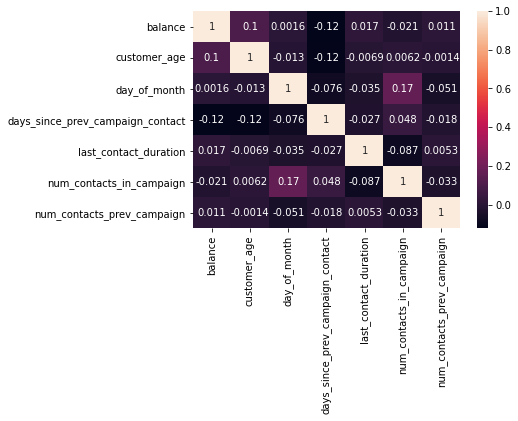

In [31]:
sns.heatmap(train[num_feature].corr(),annot=True)
plt.show()

### Baseline Models

#### Model A (Predicting all instances as majority)

In [32]:
train.target.value_counts()

0    28253
1     3394
Name: target, dtype: int64

As we saw before too, 0 is the majority class. Lets begin by predicting everything as 0.

In [33]:
pred_train = np.zeros(len(train))

accuracy = accuracy_score(train.target,pred_train)
f1 = f1_score(train.target,pred_train)

print('Accuracy Score is',accuracy)
print('F1 Score is',f1)

Accuracy Score is 0.892754447498973
F1 Score is 0.0


Had the metric been accuracy, we would have got an accuracy of almost 90 %, but F1-score is forcing us to create a better model.

#### Model B (Random Predictions with equal probability)

In [34]:
np.random.seed(2)

pred_train = np.random.choice([0,1],size=len(train))

f1_score(train.target,pred_train)

0.1767384105960265

In [35]:
np.random.seed(2)

pred_test = np.random.choice([0,1],size=len(test))

sample_sub['term_deposit_subscribed'] = pred_test

Not an excellent score. Nevertheless it is much better than getting 0.

In [36]:
#sample_sub.to_csv('Submission_test.csv',index=False)

### Feature Engineering

In [37]:
# droping the old column 
train.drop(columns='old',inplace=True)

In [38]:
# Appending the train and test date for featuring engineering
data = train.append(test)

In [39]:
def var_summary(x):
    return pd.Series([x.median(),x.mean(),x.std(),x.var(),x.std()/x.mean(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index=['Median','Mean','Std','Var','CV','Min','P1','P5','Q1','Q2','Q3','P95','P99','Max'])

num_summary = data[num_feature].apply(var_summary).T

# Exploring numerical Variable
num_summary

,Median,Mean,Std,Var,CV,Min,P1,P5,Q1,Q2,Q3,P95,P99,Max
balance,448.0,1360.104255,3013.771829,9.082821e+06,2.215839,-8020.0,-630.00,-173.5,71.0,448.0,1427.0,5765.0,13164.10,102128.0
customer_age,39.0,40.442579,10.750219,1.155672e+02,0.265814,18.0,22.00,26.0,32.0,39.0,48.0,59.0,71.00,97.0
day_of_month,16.0,15.806419,8.322476,6.926361e+01,0.526525,1.0,2.00,3.0,8.0,16.0,21.0,29.0,31.00,31.0
days_since_prev_campaign_contact,194.0,224.577692,115.344035,1.330425e+04,0.513604,1.0,7.56,79.0,133.0,194.0,327.0,370.0,531.44,871.0
last_contact_duration,180.0,257.681093,257.704129,6.641142e+04,1.000089,0.0,5.00,34.0,102.0,180.0,319.0,752.0,1266.23,4900.0
num_contacts_in_campaign,2.0,2.762929,3.091258,9.555875e+00,1.118834,1.0,1.00,1.0,1.0,2.0,3.0,8.0,16.00,63.0
num_contacts_prev_campaign,0.0,0.580323,2.303441,5.305841e+00,3.969237,0.0,0.00,0.0,0.0,0.0,0.0,3.0,8.90,275.0


#### Removing columns with high null values 

In [40]:
data.drop(columns=['days_since_prev_campaign_contact'],inplace=True)

In [41]:
data.head(3)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,target
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0.0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,1,other,0.0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0.0


#### Missing Value

Missing data (or missing values) is defined as the data value that is not stored for a variable in the observation of interest. The problem of missing data is relatively common in almost all research and can have a significant effect on the conclusions that can be drawn from the data

In [42]:
def miss_treat(x):
    x = x.fillna(x.median())
    return x

In [43]:
# Removing column with high null values
num_feature.remove('days_since_prev_campaign_contact')

In [44]:
# Replacing all the null values in numerical data with median
data[num_feature] = data[num_feature].apply(lambda x: miss_treat(x))

In [45]:
#train[cat_feature] = train[cat_feature].apply(lambda x: miss_treat_cat(x))

In [46]:
# Replacing all the null values in categorical data with mode
data.marital[data.marital.isnull()] = data.marital.mode()[0]
data.personal_loan[data.personal_loan.isnull()] = data.personal_loan.mode()[0]

#### Outlier

An outlier is an observation that lies an abnormal distance from other values in a sample from a population. In a sense, it is up to the analyst (or a consensus process) to decide what will be considered abnormal.

In [48]:
# Capping the outliers at 0.1 and 0.99 percentiles
def outlier_treat(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

data[num_feature] = data[num_feature].apply(lambda x: outlier_treat(x))

#### Checking for the Significance of Numerical Variables
We will check the significance through **Weight of Evidence**

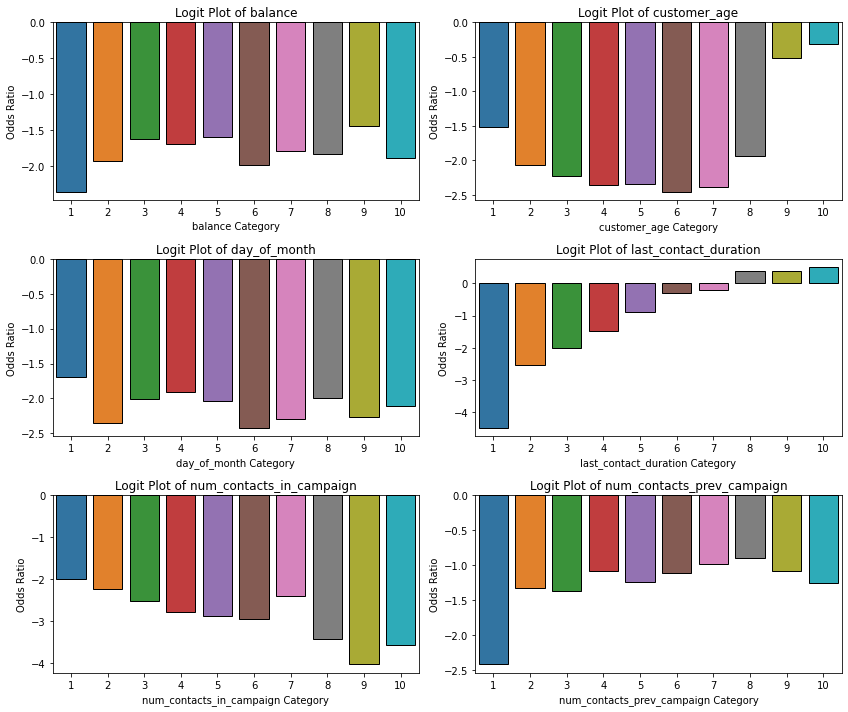

In [49]:
plt.figure(figsize=(12,10))
for i,feature in enumerate(num_feature):
    binned = pd.cut(data[feature],bins=10,labels=list(range(1,11)))
    odds = data.groupby(binned)['target'].sum()/(data.groupby(binned)['target'].count()-data.groupby(binned)['target'].sum())
    log_odds = np.log(odds)
    #fig,axes = plt.subplots(figsize = (6,3))
    plt.subplot(3,2,i+1)
    plt.tight_layout()
    sns.barplot(x=log_odds.index, y= log_odds,edgecolor='black')
    plt.ylabel('Odds Ratio')
    plt.xlabel(str(feature)+str(' Category'))
    plt.title(str('Logit Plot of ') + str(feature))

#### Checking for the Significance of Categorical Variables
We will check the significance through **Weight of Evidence**

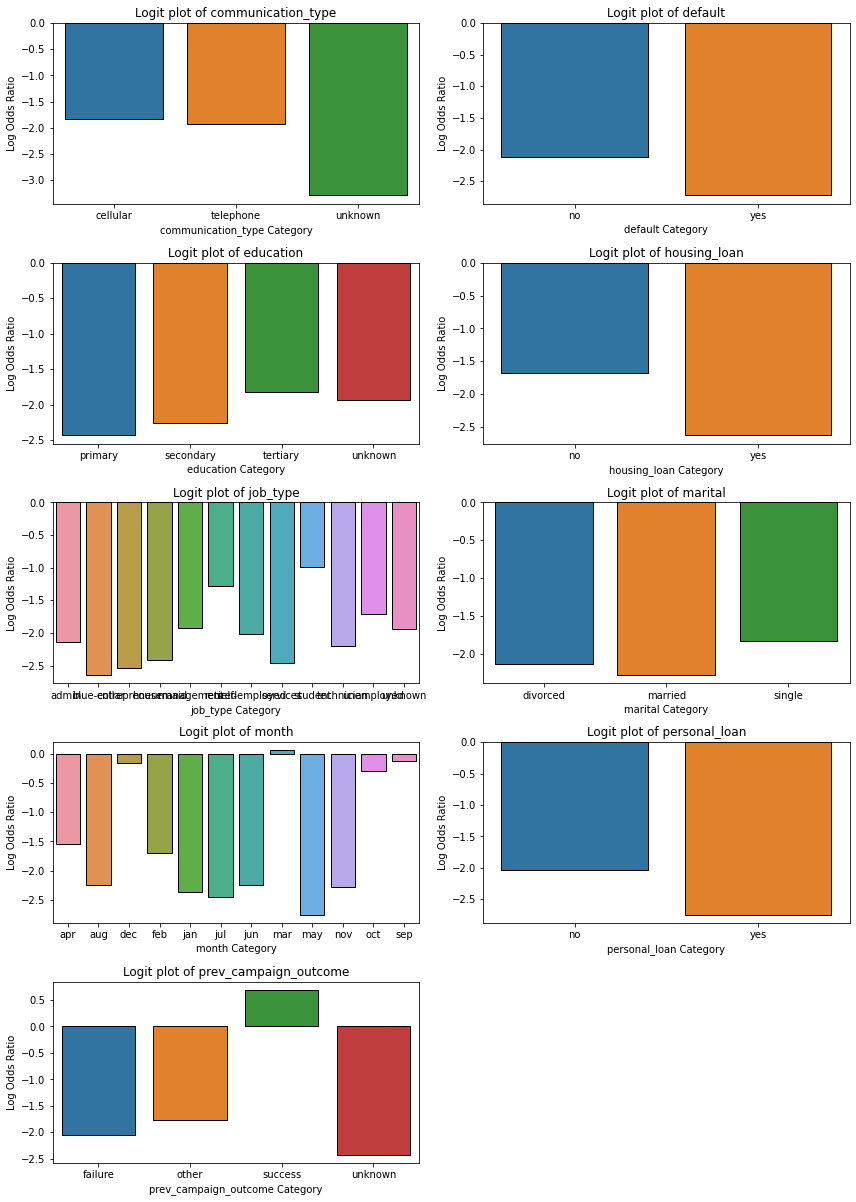

In [50]:
plt.figure(figsize=(12,33))
for i,feature in enumerate(cat_feature):
    odds = data.groupby(feature)['target'].sum()/(data.groupby(feature)['target'].count()-data.groupby(feature)['target'].sum())
    log_odds = np.log(odds)
    #fig,axes = plt.subplots(figsize=(6,3))
    plt.subplot(10,2,i+1)
    plt.tight_layout()
    sns.barplot(x=log_odds.index, y=log_odds,edgecolor='black')
    plt.ylabel('Log Odds Ratio')
    plt.xlabel(str(feature)+str(' Category'))
    plt.title(str('Logit plot of ') + str(feature))

#### Encoding Categorical Variable

In [51]:
cat_feature

['communication_type',
 'default',
 'education',
 'housing_loan',
 'job_type',
 'marital',
 'month',
 'personal_loan',
 'prev_campaign_outcome']

In [52]:
data.month.unique()

array(['jun', 'nov', 'feb', 'may', 'apr', 'aug', 'jul', 'jan', 'oct',
       'sep', 'mar', 'dec'], dtype=object)

In [53]:
data['education'] = data.education.map({'tertiary':3, 'secondary':2, 'primary':1, 'unknown':4})

In [54]:
dummies_col = ['communication_type', 'default', 'housing_loan',
       'job_type', 'marital', 'month', 'personal_loan',
       'prev_campaign_outcome']

In [55]:
data = pd.get_dummies(columns=dummies_col,data=data,drop_first=True)

In [56]:
# Renaming two columns - 'job_type_blue-collar' and 'job_type_self-employed'
data.rename(columns={'job_type_blue-collar':'job_type_blue_collar','job_type_self-employed':'job_type_self_employed'},inplace=True)

#### Dividing the data into training and testing

In [57]:
train = data[~data.target.isnull()]
test = data[data.target.isnull()]

#### Scaling 

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [58]:
# Deviding the train data into independent and target variables
train_x = train[list(train.columns.difference(['id','target']))]
train_y = train['target']

In [59]:
from sklearn.preprocessing import StandardScaler

# Scaling train_x
scaler = StandardScaler().fit(train_x)
x_scaled = scaler.transform(train_x)

In [60]:
x_scaled = pd.DataFrame(x_scaled,columns=list(train_x.columns))

In [61]:
train = pd.concat([pd.DataFrame(x_scaled),pd.DataFrame(train_y)],axis=1)

In [62]:
# Deriving columns from test to be scaled
test.drop(columns='target',inplace=True)
test_x = test[list(test.columns.difference(['id']))]

In [63]:
# Scaling test_x
scaler = StandardScaler().fit(test_x)
test_x_scaled = scaler.transform(test_x)

In [64]:
test_x_scaled = pd.DataFrame(test_x_scaled,columns=list(test_x.columns))

In [65]:
test = pd.concat([pd.DataFrame(test['id']),pd.DataFrame(test_x_scaled)],axis=1)

In [66]:
test.head(3)

,id,balance,communication_type_telephone,communication_type_unknown,customer_age,day_of_month,default_yes,education,housing_loan_yes,job_type_blue_collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self_employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,last_contact_duration,marital_married,marital_single,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,num_contacts_in_campaign,num_contacts_prev_campaign,personal_loan_yes,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,id_17231,2.661822,-0.264995,-0.631721,1.403157,-0.335069,-0.140343,1.034576,-1.100582,-0.523311,-0.185242,-0.162031,-0.509108,4.376589,-0.18904,-0.315933,-0.143853,-0.460954,-0.174764,-0.08127,-0.704201,0.808294,-0.631721,2.448542,-0.065532,-0.252507,-0.185242,-0.429082,-0.365049,-0.101754,-0.656010,-0.307103,-0.130754,-0.109944,-0.264219,-0.357751,-0.437125,-0.209059,-0.183317,0.468109
1,id_34508,-0.490222,-0.264995,-0.631721,-1.571229,0.266598,-0.140343,-0.299612,0.908610,1.910910,-0.185242,-0.162031,-0.509108,-0.228488,-0.18904,-0.315933,-0.143853,-0.460954,-0.174764,-0.08127,-0.818459,-1.237173,1.582977,-0.408406,-0.065532,-0.252507,-0.185242,-0.429082,-0.365049,-0.101754,1.524367,-0.307103,-0.130754,-0.109944,-0.264219,-0.357751,-0.437125,-0.209059,-0.183317,0.468109
2,id_44504,-0.506532,-0.264995,-0.631721,0.539626,-0.936736,-0.140343,-0.299612,-1.100582,-0.523311,-0.185242,-0.162031,-0.509108,-0.228488,-0.18904,-0.315933,-0.143853,2.169413,-0.174764,-0.08127,-0.204854,-1.237173,-0.631721,-0.408406,-0.065532,-0.252507,-0.185242,2.330554,-0.365049,-0.101754,-0.656010,-0.307103,-0.130754,-0.109944,-0.658398,-0.357751,-0.437125,-0.209059,-0.183317,0.468109


In [67]:
clf = LogisticRegression(random_state = 1)
clf.fit(x_scaled, train_y)

pred_train = clf.predict(x_scaled)

In [68]:
f1_score(train_y, pred_train)

0.5079941860465117

#### Variable reduction using Somers' D

In [69]:
import statsmodels.formula.api as sm
from sklearn import metrics

In [70]:
#train.rename(columns={'job_type_blue-collar':'job_type_blue_collar','job_type_self-employed':'job_type_self_employed'},inplace=True)

In [71]:
somerd_df = pd.DataFrame()
for feature in train.columns.difference(['target','id']):
    log_reg = sm.logit(formula=str('target~')+str(feature), data=train)
    result = log_reg.fit()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(train['target'],y_score)-1
    temp = pd.DataFrame([feature,somers_d]).T
    temp.columns = ['Feature Name','SomersD']
    somerd_df = pd.concat([somerd_df,temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.338812
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.340572
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.327713
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340366
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.340366
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.340492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338605
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330288
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338087
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340491
  

In [72]:
sd_values = somerd_df.sort_values(by='SomersD', ascending=False)
sd_values.head()

,Feature Name,SomersD
0,last_contact_duration,0.648495
0,housing_loan_yes,0.232094
0,num_contacts_prev_campaign,0.223943
0,prev_campaign_outcome_unknown,0.220618
0,communication_type_unknown,0.215644
0,prev_campaign_outcome_success,0.197111
0,balance,0.190208
0,month_may,0.152367
0,num_contacts_in_campaign,0.142968
0,education,0.117457


### Variance Inflation Factor 
We will use vif to check for multicollinearity in the data.

In [73]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
x = pd.concat([train[train.columns.difference(['target'])],train['target']], axis=1)
x.head()

,balance,communication_type_telephone,communication_type_unknown,customer_age,day_of_month,default_yes,education,housing_loan_yes,job_type_blue_collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self_employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,last_contact_duration,marital_married,marital_single,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,num_contacts_in_campaign,num_contacts_prev_campaign,personal_loan_yes,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown,target
0,-0.438531,-0.260839,1.567900,-1.186710,1.224302,-0.13336,1.037131,0.887675,-0.523923,-0.184059,-0.170402,1.935852,-0.230075,-0.190744,-0.319001,-0.146281,-0.444438,-0.171186,-0.079548,0.220175,-1.233398,1.604090,-0.39696,-0.070383,-0.248169,-0.176206,-0.42211,2.729141,-0.103902,-0.664070,-0.311612,-0.127981,-0.115553,0.501592,-0.360850,-0.434972,-0.204638,-0.187066,0.474406,0.0
1,-0.149398,-0.260839,-0.637796,-0.611016,0.261613,-0.13336,-0.300962,-1.126539,1.908676,-0.184059,-0.170402,-0.516568,-0.230075,-0.190744,-0.319001,-0.146281,-0.444438,-0.171186,-0.079548,-0.467413,0.810768,-0.623406,-0.39696,-0.070383,-0.248169,-0.176206,-0.42211,-0.366416,-0.103902,-0.664070,3.209122,-0.127981,-0.115553,-0.267995,0.321856,2.299000,4.886688,-0.187066,-2.107900,0.0
2,-0.273248,-0.260839,-0.637796,0.540373,-1.302758,-0.13336,-0.300962,-1.126539,-0.523923,-0.184059,-0.170402,-0.516568,-0.230075,-0.190744,-0.319001,-0.146281,2.250032,-0.171186,-0.079548,-0.647905,0.810768,-0.623406,-0.39696,-0.070383,4.029507,-0.176206,-0.42211,-0.366416,-0.103902,-0.664070,-0.311612,-0.127981,-0.115553,0.501592,-0.360850,-0.434972,-0.204638,-0.187066,0.474406,0.0
3,-0.564609,-0.260839,1.567900,-0.611016,0.502285,-0.13336,-0.300962,0.887675,-0.523923,-0.184059,-0.170402,-0.516568,-0.230075,-0.190744,3.134787,-0.146281,-0.444438,-0.171186,-0.079548,-0.536172,-1.233398,1.604090,-0.39696,-0.070383,-0.248169,-0.176206,-0.42211,-0.366416,-0.103902,1.505865,-0.311612,-0.127981,-0.115553,0.116798,-0.360850,-0.434972,-0.204638,-0.187066,0.474406,0.0
4,0.036824,-0.260839,-0.637796,0.060628,-0.340069,-0.13336,-1.639055,0.887675,1.908676,-0.184059,-0.170402,-0.516568,-0.230075,-0.190744,-0.319001,-0.146281,-0.444438,-0.171186,-0.079548,-0.871372,0.810768,-0.623406,-0.39696,-0.070383,-0.248169,-0.176206,-0.42211,-0.366416,-0.103902,1.505865,-0.311612,-0.127981,-0.115553,-0.267995,-0.360850,-0.434972,-0.204638,-0.187066,0.474406,0.0


In [75]:
#train.drop(columns=['old'],inplace=True)

In [76]:
'+'.join(train.columns)

'balance+communication_type_telephone+communication_type_unknown+customer_age+day_of_month+default_yes+education+housing_loan_yes+job_type_blue_collar+job_type_entrepreneur+job_type_housemaid+job_type_management+job_type_retired+job_type_self_employed+job_type_services+job_type_student+job_type_technician+job_type_unemployed+job_type_unknown+last_contact_duration+marital_married+marital_single+month_aug+month_dec+month_feb+month_jan+month_jul+month_jun+month_mar+month_may+month_nov+month_oct+month_sep+num_contacts_in_campaign+num_contacts_prev_campaign+personal_loan_yes+prev_campaign_outcome_other+prev_campaign_outcome_success+prev_campaign_outcome_unknown+target'

In [77]:
a,b = dmatrices(formula_like = 'target~customer_age+education+balance+day_of_month+last_contact_duration+num_contacts_in_campaign+num_contacts_prev_campaign+communication_type_telephone+communication_type_unknown+default_yes+housing_loan_yes+job_type_blue_collar+job_type_entrepreneur+job_type_housemaid+job_type_management+job_type_retired+job_type_self_employed+job_type_services+job_type_student+job_type_technician+job_type_unemployed+job_type_unknown+marital_married+marital_single+month_dec+month_feb+month_jan+month_mar+month_nov+month_oct+month_sep+personal_loan_yes+prev_campaign_outcome_other+prev_campaign_outcome_success',data=x,return_type='dataframe')

In [78]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif['Feature'] = b.columns

In [79]:
print(vif.sort_values(by='VIF Factor',ascending=False))

    VIF Factor                        Feature
24    2.833741                 marital_single
23    2.497061                marital_married
15    2.484922            job_type_management
12    2.375465           job_type_blue_collar
20    2.058969            job_type_technician
18    1.647682              job_type_services
16    1.645444               job_type_retired
1     1.609267                   customer_age
2     1.423213                      education
7     1.420223     num_contacts_prev_campaign
17    1.281644         job_type_self_employed
13    1.267569          job_type_entrepreneur
14    1.251360             job_type_housemaid
9     1.246510     communication_type_unknown
19    1.243268               job_type_student
4     1.234979                   day_of_month
21    1.232069            job_type_unemployed
33    1.224851    prev_campaign_outcome_other
34    1.205685  prev_campaign_outcome_success
11    1.193425               housing_loan_yes
26    1.157239                    

### Dividing the data into training and validation

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
train,validation = train_test_split(train,test_size=0.3,random_state=114)

### Building Model (Logistic Regression)

In [81]:
#train_final = pd.concat([pd.DataFrame(x_scaled),pd.DataFrame(train_y)],axis=1)

In [82]:
log_reg = sm.logit(formula='target~customer_age+education+balance+day_of_month+last_contact_duration+num_contacts_in_campaign+num_contacts_prev_campaign+communication_type_telephone+communication_type_unknown+default_yes+housing_loan_yes+job_type_blue_collar+job_type_entrepreneur+job_type_housemaid+job_type_management+job_type_retired+job_type_self_employed+job_type_services+job_type_student+job_type_technician+job_type_unemployed+job_type_unknown+marital_married+marital_single+month_dec+month_feb+month_jan+month_mar+month_nov+month_oct+month_sep+personal_loan_yes+prev_campaign_outcome_other+prev_campaign_outcome_success',data=train)
result=log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.204659
         Iterations 8


In [83]:
print(result.summary2())

                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.404    
Dependent Variable:       target               AIC:                  9137.2161
Date:                     2021-03-01 10:56     BIC:                  9417.4150
No. Observations:         22152                Log-Likelihood:       -4533.6  
Df Model:                 34                   LL-Null:              -7601.0  
Df Residuals:             22117                LLR p-value:          0.0000   
Converged:                1.0000               Scale:                1.0000   
No. Iterations:           8.0000                                              
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------------
Intercept                     -3.2074   0.0434 -73.9262 0.0000 -3.2924 -3.1224
custo

## Metrics

### Somers D
We want to achieve high Somers' D.

In [84]:
# Train data Somers' D
train_gini = 2*metrics.roc_auc_score(train['target'],result.predict(train))-1 
print('Train Gini:',train_gini)

# Validation data Somers' D
validation_gini = 2*metrics.roc_auc_score(validation['target'],result.predict(validation))-1
print('Validation Gini:',validation_gini)


Train Gini: 0.8577675230294806
Validation Gini: 0.8452633501553928


### AUC
We want to achieve high AUC.

In [85]:
# Train data AUC
train_auc = metrics.roc_auc_score(train['target'],result.predict(train))
print('Train AUC:',train_auc)
# Validation data AUC
validation_auc = metrics.roc_auc_score(validation['target'],result.predict(validation))
print('Validation AUC:',validation_auc)

Train AUC: 0.9288837615147403
Validation AUC: 0.9226316750776964


#### Predicting on Train data

In [86]:
# Train Predicted
train_pred_prob = pd.DataFrame(result.predict(train))
train_pred_prob.columns = ['prob']
train_actual = train['target']
# Making a dataframe
train_pred = pd.concat([train_actual,train_pred_prob], axis = 1)
train_pred.columns = ['Actual','Prob']
train_pred.head()

,Actual,Prob
23200,0.0,0.035425
25256,0.0,0.100039
3724,0.0,0.006878
3873,0.0,0.010922
7674,0.0,0.038236


#### Predicting on Validation data

In [87]:
## Validation Predicted
validation_pred_prob = pd.DataFrame(result.predict(validation))
validation_pred_prob.columns = ['prob']
validation_actual = validation['target']
## Making a dataframe
validation_pred = pd.concat([validation_actual,validation_pred_prob], axis = 1)
validation_pred.columns = ['Actual','Prob']
validation_pred.head()

,Actual,Prob
31640,1.0,0.119935
9297,0.0,0.732804
18715,1.0,0.414724
26661,1.0,0.142245
18719,0.0,0.006406


### Calculating metrics for each cut-off

In [88]:
# Confusion matrix for each cutoff
roc_like_df = pd.DataFrame()
train_temp = train_pred.copy()

for cut_off in np.linspace(0,1,50):
    #train_temp['CutOff'] = cut_off
    train_temp['Predicted'] = train_temp['Prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x:1.0 if x['Actual']==1.0 and x['Predicted']==1.0 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x:1.0 if x['Actual']==0.0 and x['Predicted']==0.0 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x:1.0 if x['Actual']==0.0 and x['Predicted']==1.0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x:1.0 if x['Actual']==1.0 and x['Predicted']==0.0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum()/(train_temp['tp'].sum()+train_temp['fn'].sum())
    specificity = train_temp['tn'].sum()/(train_temp['tn'].sum()+train_temp.fp.sum())
    accuracy = (train_temp['tp'].sum()+train_temp['tn'].sum())/(train_temp['tp'].sum()+train_temp['tn'].sum()+train_temp['fp'].sum()+train_temp['fn'].sum())
    cutoff = cut_off
    roc_like_table = pd.DataFrame([cutoff,sensitivity,specificity,accuracy]).T
    roc_like_table.columns = ['cutoff','Sensitivity','Specificity','Accuracy']
    roc_like_df = pd.concat([roc_like_df,roc_like_table], axis=0)

In [89]:
roc_like_df.head()

,cutoff,Sensitivity,Specificity,Accuracy
0,0.000000,1.000000,0.000000,0.108388
0,0.020408,0.995002,0.442864,0.502709
0,0.040816,0.972511,0.653891,0.688425
0,0.061224,0.944190,0.759202,0.779252
0,0.081633,0.905873,0.819351,0.828729


In [90]:
# Finding ideal cutoff
roc_like_df['Total'] = roc_like_df['Sensitivity'] + roc_like_df['Specificity']

In [91]:
roc_like_df.head()

,cutoff,Sensitivity,Specificity,Accuracy,Total
0,0.000000,1.000000,0.000000,0.108388,1.000000
0,0.020408,0.995002,0.442864,0.502709,1.437866
0,0.040816,0.972511,0.653891,0.688425,1.626402
0,0.061224,0.944190,0.759202,0.779252,1.703392
0,0.081633,0.905873,0.819351,0.828729,1.725223


In [92]:
# Cutoff based on highest sensitivity+specificity
roc_like_df[roc_like_df['Total']==roc_like_df['Total'].max()]

,cutoff,Sensitivity,Specificity,Accuracy,Total
0,0.081633,0.905873,0.819351,0.828729,1.725223


In [93]:
validation_pred.head()

,Actual,Prob
31640,1.0,0.119935
9297,0.0,0.732804
18715,1.0,0.414724
26661,1.0,0.142245
18719,0.0,0.006406


### Predicting on Train and Validation based on the ideal cut-off

In [94]:
# Train and test predicted based in cutoff 0.0816
train_pred['Predicted'] = train_pred['Prob'].apply(lambda x: 0 if x<0.0816 else 1)
validation_pred['Predicted'] = validation_pred['Prob'].apply(lambda x: 0 if x<0.0816 else 1)

In [95]:
pd.crosstab(train_pred['Actual'],train_pred['Predicted'])

Predicted,0,1
Actual,,
0.0,16181,3570
1.0,226,2175


In [96]:
# F1 Score of train data
f1_score(train_pred.Actual,train_pred.Predicted)

0.5340044193469187

In [97]:
pd.crosstab(validation_pred['Actual'],validation_pred['Predicted'])

Predicted,0,1
Actual,,
0.0,6921,1581
1.0,105,888


In [98]:
# F1 Score of test data
f1_score(validation_pred.Actual,validation_pred.Predicted)

0.512998266897747

#### Accuracy Score

In [99]:
# Calculating accuracy score
print('Accuracy of Train data:', metrics.accuracy_score(train_pred.Actual,train_pred.Predicted))
print('Accuracy of Validation data:', metrics.accuracy_score(validation_pred.Actual,validation_pred.Predicted))

Accuracy of Train data: 0.8286384976525821
Accuracy of Validation data: 0.822432859399684


In [100]:
# classification report of Train data
print(metrics.classification_report(train_pred.Actual,train_pred.Predicted))

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90     19751
         1.0       0.38      0.91      0.53      2401

    accuracy                           0.83     22152
   macro avg       0.68      0.86      0.71     22152
weighted avg       0.92      0.83      0.86     22152



In [101]:
# classification report of Train data
print(metrics.classification_report(validation_pred.Actual,validation_pred.Predicted))

              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89      8502
         1.0       0.36      0.89      0.51       993

    accuracy                           0.82      9495
   macro avg       0.67      0.85      0.70      9495
weighted avg       0.92      0.82      0.85      9495



### Predicting on Test data

In [102]:
test.head(3)

,id,balance,communication_type_telephone,communication_type_unknown,customer_age,day_of_month,default_yes,education,housing_loan_yes,job_type_blue_collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self_employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,last_contact_duration,marital_married,marital_single,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,num_contacts_in_campaign,num_contacts_prev_campaign,personal_loan_yes,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,id_17231,2.661822,-0.264995,-0.631721,1.403157,-0.335069,-0.140343,1.034576,-1.100582,-0.523311,-0.185242,-0.162031,-0.509108,4.376589,-0.18904,-0.315933,-0.143853,-0.460954,-0.174764,-0.08127,-0.704201,0.808294,-0.631721,2.448542,-0.065532,-0.252507,-0.185242,-0.429082,-0.365049,-0.101754,-0.656010,-0.307103,-0.130754,-0.109944,-0.264219,-0.357751,-0.437125,-0.209059,-0.183317,0.468109
1,id_34508,-0.490222,-0.264995,-0.631721,-1.571229,0.266598,-0.140343,-0.299612,0.908610,1.910910,-0.185242,-0.162031,-0.509108,-0.228488,-0.18904,-0.315933,-0.143853,-0.460954,-0.174764,-0.08127,-0.818459,-1.237173,1.582977,-0.408406,-0.065532,-0.252507,-0.185242,-0.429082,-0.365049,-0.101754,1.524367,-0.307103,-0.130754,-0.109944,-0.264219,-0.357751,-0.437125,-0.209059,-0.183317,0.468109
2,id_44504,-0.506532,-0.264995,-0.631721,0.539626,-0.936736,-0.140343,-0.299612,-1.100582,-0.523311,-0.185242,-0.162031,-0.509108,-0.228488,-0.18904,-0.315933,-0.143853,2.169413,-0.174764,-0.08127,-0.204854,-1.237173,-0.631721,-0.408406,-0.065532,-0.252507,-0.185242,2.330554,-0.365049,-0.101754,-0.656010,-0.307103,-0.130754,-0.109944,-0.658398,-0.357751,-0.437125,-0.209059,-0.183317,0.468109


### Predicting on the Test data

In [103]:
# Test Predict
test_pred_prob = pd.DataFrame(result.predict(test))
test_pred_prob.columns = ['prob']
test_id = test['id']

In [104]:
# Making a dataframe
test_pred = pd.concat([test_id,test_pred_prob], axis = 1)
test_pred.columns = ['Id','Prob']
test_pred.head()

,Id,Prob
0,id_17231,0.077434
1,id_34508,0.014671
2,id_44504,0.069731
3,id_174,0.010562
4,id_2115,0.555162


In [105]:
test_pred['Predicted'] = test_pred['Prob'].apply(lambda x: 0 if x<0.0816 else 1)

In [106]:
test_pred.head()

,Id,Prob,Predicted
0,id_17231,0.077434,0
1,id_34508,0.014671,0
2,id_44504,0.069731,0
3,id_174,0.010562,0
4,id_2115,0.555162,1


In [107]:
final_sub = test_pred[['Id','Predicted']]

In [108]:
final_sub.rename(columns={'Id':'id','Predicted':'term_deposit_subscribed'},inplace=True)

In [109]:
final_sub.to_csv('final_sub.csv',index=False)

#### Spliting the train data into train and validate

In [92]:
# First we seperate the data into trainx and trainy
train_x = train[train.columns.difference(['target'])]
train_y = train['target']

In [93]:
validate_x = validation[validation.columns.difference(['target'])]
validate_y = validation['target']

### Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
paragrid_rf = {'n_estimators':[70,80,90,100,110,120],
              'max_features': [10,11,12,13,14,15]}

gscv_rf = GridSearchCV(estimator=RandomForestClassifier(),
                      param_grid=paragrid_rf,
                      cv = 10,
                      verbose=True,n_jobs=-1)
gscv_result = gscv_rf.fit(train_x,train_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 12.9min finished


In [144]:
gscv_result.best_params_

{'max_features': 12, 'n_estimators': 120}

In [145]:
gscv_rf.best_score_

0.9144097513670332

In [150]:
rf_clf = RandomForestClassifier(oob_score=True, n_estimators=120,max_features=12,n_jobs=-1)
rf_clf.fit(train_x,train_y)

RandomForestClassifier(max_features=12, n_estimators=120, n_jobs=-1,
                       oob_score=True)

In [151]:
rf_clf.n_features_

39

In [152]:
train_pred = rf_clf.predict(train_x)

In [153]:
validate_pred = rf_clf.predict(validate_x)

In [154]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19751
         1.0       1.00      1.00      1.00      2401

    accuracy                           1.00     22152
   macro avg       1.00      1.00      1.00     22152
weighted avg       1.00      1.00      1.00     22152



In [155]:
print(metrics.classification_report(validate_y,validate_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      8502
         1.0       0.63      0.47      0.54       993

    accuracy                           0.92      9495
   macro avg       0.79      0.72      0.75      9495
weighted avg       0.91      0.92      0.91      9495



In [ ]:
test_x = test[test.columns.difference(['id'])]

test_id = test['id']

In [163]:
test_pred = rf_clf.predict(test_x)

In [167]:
final_sub = pd.concat([pd.DataFrame(test_id),pd.DataFrame(test_pred)],axis=1)

In [173]:
final_sub.columns = ['id','term_deposit_subscribed']

In [176]:
final_sub.to_csv('final_sub.csv',index=False)

### Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dtc = DecisionTreeClassifier(random_state=1)

dtc.fit(train_x,train_y)

pred_val = dtc.predict(validate_x)

In [119]:
f1_score(validate_y,pred_val)

0.4859903381642512

In [135]:
# Hyper parameter tuning
para_comb = {'max_depth':[4,6,8,10,12,14,16],
             'criterion':['gini','entropy'],
             'min_samples_split':[5,10,20,30,40],
             'max_features':[0.2,0.4,0.6,0.8,1],
             'max_leaf_nodes':[8,16,32,64,128,256],
            'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]}

gs_dt = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=para_comb,
                    scoring='f1',
                    verbose=True,n_jobs=-1)

In [136]:
gs_dt.fit(train_x,train_y)

Fitting 5 folds for each of 10500 candidates, totalling 52500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3548 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4848 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 6348 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 8048 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 9948 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 12048 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 14348 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 16848 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 19548 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 22448 tasks  

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 1],
                         'max_leaf_nodes': [8, 16, 32, 64, 128, 256],
                         'min_samples_split': [5, 10, 20, 30, 40]},
             scoring='f1', verbose=True)

In [137]:
gs_dt.best_estimator_

DecisionTreeClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=16, max_features=0.8, max_leaf_nodes=128,
                       min_samples_split=40)

In [138]:
gs_dt.best_params_

{'class_weight': {0: 1, 1: 2},
 'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 0.8,
 'max_leaf_nodes': 128,
 'min_samples_split': 40}

In [139]:
gs_dt.best_score_

0.6210331964284452

In [144]:
dtc = DecisionTreeClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=16, max_features=0.8, max_leaf_nodes=128,
                       min_samples_split=40)

dtc.fit(train_x,train_y)

DecisionTreeClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=16, max_features=0.8, max_leaf_nodes=128,
                       min_samples_split=40)

In [145]:
pred_val = dtc.predict(validate_x)
f1_score(validate_y,pred_val)

0.599827882960413

In [149]:
# Predicting on test data
target = dtc.predict(test_x_scaled)
test_id = test['id']
final_sub = pd.concat([pd.Series(test_id),pd.Series(target)],axis=1)
final_sub.columns = ['id','term_deposit_subscribed']

In [150]:
final_sub.to_csv('final_sub.csv',index=False)

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
paragrid_gbm = {'n_estimators':[300,350,400],
                'learning_rate':[10**x for x in range(-3,1)],
                'max_feature':[5,6,7,8,9,10]}

In [ ]:
gscv_gbm =GridSearchCV(GradientBoostingClassifier(),
                       param_grid=paragrid_gbm,
                      cv=5,
                      verbose=True,n_jobs=-1)

In [ ]:
gscv_gbm.fit(train_x,train_y)

### Xg boost

In [151]:
from xgboost import XGBClassifier

In [176]:
para_comb = {'criterion':['gini','entropy'],
             'max_features':[0.6,0.8],
            'n_estimators': [50,100,150],
           'learning_rate': [10**x for x in range(-2,1)]}


In [84]:
#paragrid = {'n_estimators': [200,300],
#           'learning_rate': [10**x for x in range(-2,1)],
 #          'max_features' : [7,8]}

In [177]:
gscv_xgbm = GridSearchCV(estimator=XGBClassifier(),
                        param_grid=para_comb,
                        cv=5, scoring='f1',
                        verbose=True, n_jobs=-1)

In [178]:
gscv_xgbm.fit(train_x,train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.2min finished


[14:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [179]:
gscv_xgbm.best_params_

{'criterion': 'gini',
 'learning_rate': 0.1,
 'max_features': 0.6,
 'n_estimators': 150}

In [181]:
gscv_xgbm.best_score_

0.5607415934778219

In [182]:
xgbm = gscv_xgbm.best_estimator_

In [183]:
xgbm.fit(train_x,train_y)

[14:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              max_features=0.6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [184]:
print(metrics.f1_score(validate_y,xgbm.predict(validate_x)))
print(metrics.roc_auc_score(validate_y,xgbm.predict(validate_x)))

0.5611111111111111
0.7365194327831873


In [99]:
test_x.head(3)

,balance,communication_type_telephone,communication_type_unknown,customer_age,day_of_month,default_yes,education,housing_loan_yes,job_type_blue_collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self_employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,last_contact_duration,marital_married,marital_single,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,num_contacts_in_campaign,num_contacts_prev_campaign,personal_loan_yes,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,7136.0,0,0,55.0,13,0,3,0,0,0,0,0,1,0,0,0,0,0,0,90.0,1,0,1,0,0,0,0,0,0,0,0,0,0,2.0,0.0,0,0,0,1
1,179.0,0,0,24.0,18,0,2,1,1,0,0,0,0,0,0,0,0,0,0,63.0,0,1,0,0,0,0,0,0,0,1,0,0,0,2.0,0.0,0,0,0,1
2,143.0,0,0,46.0,8,0,2,0,0,0,0,0,0,0,0,0,1,0,0,208.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.0,0,0,0,1


In [185]:
# Predicting on test data
target = xgbm.predict(test_x_scaled)

In [186]:
test_id = test['id']

In [187]:
final_sub = pd.concat([pd.Series(test_id),pd.Series(target)],axis=1)
final_sub.columns = ['id','term_deposit_subscribed']

In [189]:
final_sub.to_csv('final_sub.csv',index=False)